In [1]:
# ÂØºÂÖ•ÊâÄÈúÄÁöÑÂ∫ì
from bs4 import BeautifulSoup
import requests
import re
import os
import urllib
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from emoji import emojize
import numpy as np
# Ëß£ÂÜ≥ matplotlib ‰∏≠Êñá‰π±Á†Å
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
# ‰ªéÈ´òÂæ∑Âú∞ÂõæÁöÑAPI‰∏äËé∑ÂèñÂπøÂ∑ûÂú∞ÈìÅjsonÊï∞ÊçÆÁöÑÂáΩÊï∞
def get_metro_data():
    url = 'http://map.amap.com/service/subway?_1469083453978&srhdata=4401_drw_guangzhou.json'
    html = urllib.request.urlopen(url)
    result = json.loads(html.read().decode("utf-8"))
    return result

In [3]:
# Ëé∑ÂèñÂú∞ÈìÅÊï∞ÊçÆ
gz_data = get_metro_data()

In [4]:
gz_data

{'s': 'ÂπøÂ∑ûÂ∏ÇÂú∞ÈìÅ',
 'i': '4401',
 'l': [{'st': [{'rs': '435 975|435 975',
     'udpx': '432 975;438 975',
     'su': '1',
     'udsu': '1;1',
     'n': 'Ë•øÂ°±',
     'sid': '440100023043015',
     'p': '435 975',
     'r': '440100023049|440100023043',
     'udsi': '440100023049017;440100023050002',
     't': '1',
     'si': '440100023043015',
     'sl': '113.231978,23.065437',
     'udli': '440100023049;440100023050',
     'poiid': 'BV10024397',
     'lg': '4',
     'sp': 'xi ?'},
    {'rs': '435 939',
     'udpx': '438 939;432 939',
     'su': '1',
     'udsu': '1;1',
     'n': 'ÂùëÂè£',
     'sid': '440100023049016',
     'p': '435 939',
     'r': '440100023049',
     'udsi': '440100023050003;440100023049016',
     't': '0',
     'si': '440100023049016',
     'sl': '113.232498,23.078878',
     'udli': '440100023050;440100023049',
     'poiid': 'BV10021881',
     'lg': '2',
     'sp': 'keng kou'},
    {'rs': '434 905',
     'udpx': '431 905;437 905',
     'su': '1',
     'udsu'

In [5]:
# ‰ªéËé∑ÂèñÁöÑjsonÊï∞ÊçÆ‰∏≠ÔºåÊèêÂèñÁõ∏ÂÖ≥Â≠óÊÆµÂπ∂ÂÜôÂÖ•csv
for i in gz_data['l']:
    for j in i['st']:
        with open('./gz_metro_data.csv','a+') as f:
            f.write("ÂπøÂ∑ûÂ∏ÇÂú∞ÈìÅ"+','+i['ln']+','+j['n']+','+j['sl']+','+j['sp']+','+j['p']+','+j['t']+','+j['si']+','+j['udsi']+','+j['udli']+','+j['sid']+','+j['udpx']+','+j['lg']+','+j['poiid']+','+j['rs']+ '\n')

In [ ]:
# ÂÆö‰πâdataframeÂàóÂêçÁß∞ÂíåËØªÂèñgz_metro_data.csv
names = ['ln','n','x','y','sp','p','t','si','udsi','udli','sid','udpx','lg','poiid','rs']
gz_data = pd.read_csv('gz_metro_data.csv',engine='python',error_bad_lines=False,header=None, names = names)

In [ ]:
# ‰ΩøÁî®groupbyÊñπÊ≥ïÔºåËÅöÂêàÂú∞ÈìÅÁ∫øË∑ØÂíåÁ∫øË∑ØÂØπÂ∫îÁöÑÁ´ôÁÇπÂêçÁß∞
gz_data_df = gz_data.groupby(["ln"])['n'].apply(list).reset_index()

In [ ]:
gz_data_df.head()

In [ ]:
# ÊääÂú∞ÈìÅÁ∫øË∑ØÂíåÁ∫øË∑ØÂØπÂ∫îÁöÑÁ´ôÁÇπÔºå‰ªédataframe‰∏≠ËΩ¨ÊàêÂ≠óÂÖ∏ÂΩ¢ÂºèÔºåÂ≠òÂÇ®ÊØèÊù°Á∫ø‰∏äÁöÑÂú∞ÈìÅÁ´ôÈ°∫Â∫è
station_line = defaultdict(dict)
for ln,n in gz_data_df[['ln','n']].itertuples(index = False):
    station_line[ln] = n

station_line

In [ ]:
# stationsÊòØ‰∏Ä‰∏™ÈõÜÂêàÔºåÂ≠òÂÇ®ÊâÄÊúâÂú∞ÈìÅÁ´ôÁÇπÂêçÁß∞ÔºåÂ∑≤ÂéªÈáç
stations = []
for i in gz_data_df['n'].values:
    #print(i)
    for j in i:
        stations.append(j)

In [ ]:
stations = set(stations)

In [ ]:
stations

In [19]:
# ÂàõÂª∫connectionsÁ©∫Â≠óÂÖ∏Êù•Â≠òÂÇ®ËøûÊé•
connections = dict()
# Â∞ÜÊØè‰∏™Á´ôÁÇπ‰Ωú‰∏∫keyÊîæÂÖ•Â≠óÂÖ∏
for s in stations:
    connections[s] = set()
# ÈÅçÂéÜstation_line.keys()Ôºåkey‰∏∫Á∫øË∑ØÂêçÁß∞ÔºåÂ¶Ç13Âè∑Á∫ø
for key in station_line.keys(): # ÁîüÊàêÂÆûÁ´ôÁΩëÁªú
    # Ëé∑ÂèñÁ∫øË∑ØÈáåÁöÑÁ´ôÁÇπ‰∏™Êï∞ÔºåÂπ∂ÈÅçÂéÜ
    for i in range(len(station_line[key])):
        # i=0‰∏∫È¶ñÁ´ôÔºåÊâÄ‰ª•È¶ñÁ´ôÁöÑÈ¢ÜÁ´ôÂè™Êúâ1‰∏™Á´ôÁÇπ
        if i == 0:
            connections[station_line[key][i]].add(station_line[key][i+1])
        elif i == len(station_line[key])-1:
            connections[station_line[key][i]].add(station_line[key][i-1])
        else:
            connections[station_line[key][i]].add(station_line[key][i-1])
            connections[station_line[key][i]].add(station_line[key][i+1])


In [20]:
connections

{'Â∫ÜÁõõ': {'‰∏úÊ∂å', 'ÈªÑÈòÅÊ±ΩËΩ¶Âüé'},
 'Á∫¢Âç´': {'Êñ∞Âçó', 'Êñ∞Âíå'},
 'Ë•øÂú∫': {'‰∏≠Â±±ÂÖ´', 'Ë•øÊùë'},
 'ÈíüÊùë': {'Ê±âÊ∫™ÈïøÈöÜ', 'Ë∞¢Êùë'},
 'Êñ∞Âüé‰∏ú': {'‰∏úÂπ≥'},
 'ÈïáÈæôÂåó': {'Ê±§Êùë', 'ÈïáÈæô'},
 'ÊûóÂíåË•ø': {'‰ΩìËÇ≤‰∏≠ÂøÉÂçó', '‰ΩìËÇ≤Ë•øË∑Ø', 'ÂπøÂ∑û‰∏úÁ´ô'},
 '‰∏≠Êñ∞': {'ÂùëË¥ù', 'ÈïáÈæô'},
 'Âù¶Â∞æ': {'‰∏≠Â±±ÂÖ´', 'Â¶ÇÊÑèÂùä', 'Ê≤≥Ê≤ô', 'ÊªòÂè£'},
 'ÂçóÊ°ÇË∑Ø': {'Ê°ÇÂüé', 'Á§åÂ≤ó'},
 'ÂêåÁ¶èË•ø': {'Âá§Âá∞Êñ∞Êùë', 'ÊñáÂåñÂÖ¨Âõ≠'},
 'Êñ∞Ê∏Ø‰∏ú': {'Áê∂Ê¥≤', 'Á£®Á¢üÊ≤ô'},
 'Á£®Á¢üÊ≤ô': {'Êñ∞Ê∏Ø‰∏ú', 'Ëµ§Â≤ó'},
 'Ê§çÁâ©Âõ≠': {'ÈïøÊπ¥', 'ÈæôÊ¥û'},
 'Â§™Âíå': {'Â§èËâØ', 'Á´πÊñô'},
 'ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫': {'ÁôΩ‰∫ëÂÖ¨Âõ≠', 'ËêßÂ≤ó'},
 'ÂêåÂíå': {'‰∫¨Ê∫™ÂçóÊñπÂåªÈô¢', 'Ê∞∏Ê≥∞'},
 'Â∞èÂåó': {'ÂπøÂ∑ûÁÅ´ËΩ¶Á´ô', 'Ê∑òÈáë'},
 'Êñ∞Ê≤ô': {'ÂÆòÊπñ'},
 'Ê∏ÖÂ∏É': {'Ê∏ÖÂ°ò', 'Ëé≤Â°ò'},
 'Êñ∞Âíå': {'Â§™Âπ≥', 'Á∫¢Âç´', 'È©¨Ê≤•'},
 'Êú∫Âú∫Âçó(1Âè∑Ëà™Á´ôÊ•º)': {'Êú∫Âú∫Âåó(2Âè∑Ëà™Á´ôÊ•º)', 'È´òÂ¢û'},
 'Ê≤•Êªò': {'ÂçóÊ¥≤', 'Âé¶Êªò', 'Â§ßÂ°ò'},
 'Â§™Âπ≥': {'Êñ∞Âíå', 'Á•ûÂ≤ó'},
 'Â¢ûÂüéÂπøÂú∫':

In [21]:
data = pd.pivot_table(gz_data,index=['ln','n']).reset_index()

In [22]:
data.head()

ln     n  lg               si              sid  t           x          y
0  13Âè∑Á∫ø    ÂçóÂ≤ó   2  900000071578006  900000071578006  0  113.541438  23.095253
1  13Âè∑Á∫ø  ÂçóÊµ∑Á•ûÂ∫ô   4  900000071578004  900000071578004  0  113.497434  23.083718
2  13Âè∑Á∫ø    ÂèåÂ≤ó   4  900000071578003  900000071578003  0  113.474331  23.094468
3  13Âè∑Á∫ø    Â§èÂõ≠   4  900000071578005  900000071578005  0  113.518376  23.082901
4  13Âè∑Á∫ø    ÂÆòÊπñ   0  900000071578010  900000071578010  0  113.636569  23.137226

In [23]:
data['x_y'] = tuple((x) for x in data[['x','y']].values.tolist())

In [24]:
# ÊääÁ´ôÁÇπÂêçÁß∞ÂíåÁ´ôÁÇπÂØπÂ∫îÁöÑÁªèÁ∫¨Â∫¶ÁªÑÂêàÊàêÂ≠óÂÖ∏ÔºõÂ¶ÇÔºö {'ÂçóÂ≤ó': (113.54143799999999, 23.095253)}
station_location = defaultdict(dict)
for n,x_y in data[['n','x_y']].itertuples(index = False):
    station_location[n] = x_y

print(station_location)

defaultdict(<class 'dict'>, {'ÂçóÂ≤ó': (113.54143799999999, 23.095253), 'ÂçóÊµ∑Á•ûÂ∫ô': (113.49743400000001, 23.083718), 'ÂèåÂ≤ó': (113.474331, 23.094468), 'Â§èÂõ≠': (113.518376, 23.082901), 'ÂÆòÊπñ': (113.636569, 23.137226000000002), 'Êñ∞Â°ò': (113.604472, 23.131731), 'Êñ∞Ê≤ô': (113.64941699999999, 23.136863), 'Ê≤ôÊùë': (113.570399, 23.11059), 'ÁôΩÊ±ü': (113.59562700000001, 23.123235), 'Ë£ï‰∏∞Âõ¥': (113.45501100000001, 23.094934), 'È±ºÁè†': (113.43226100000001, 23.100431), '‰∏úÈ£é': (113.600801, 23.566233), '‰ªéÂåñÂÆ¢ËøêÁ´ô': (113.59472099999999, 23.531769), 'ÂòâÁ¶æÊúõÂ≤ó': (113.289243, 23.237460000000002), 'Â§èËâØ': (113.32350500000001, 23.277704), 'Â§™Âíå': (113.347197, 23.299284), 'Â§™Âπ≥': (113.491955, 23.45209), 'Êñ∞Âíå': (113.46706, 23.413259), 'ÁôΩ‰∫ë‰∏úÂπ≥': (113.31784099999999, 23.251170000000002), 'Á•ûÂ≤ó': (113.51739599999999, 23.475101000000002), 'Á´πÊñô': (113.36833200000001, 23.348496), 'Ëµ§Ëçâ': (113.56025600000001, 23.50122), 'ÈíüËêΩÊΩ≠': (113.40068600000001, 23.375649

F:\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.5, 1.0, 'ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæ')

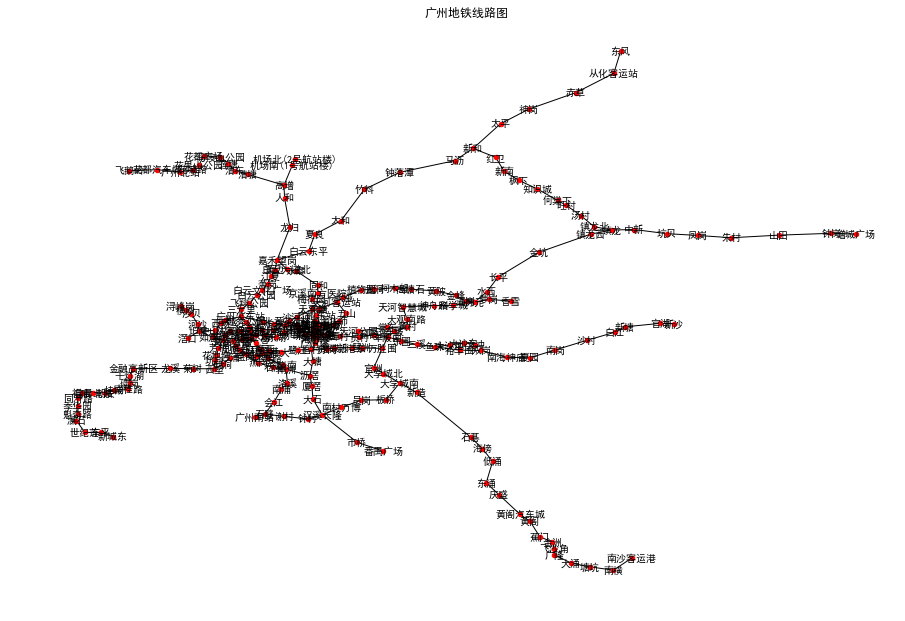

In [25]:
# Ê†πÊçÆÁªèÁ∫¨Â∫¶ÁªòÂà∂ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæ
station_graph = nx.Graph(connections)                
station_graph.add_nodes_from(stations)
plt.figure(figsize=(12,8)) #ÂàõÂª∫‰∏ÄÂπÖÂõæ
nx.draw(station_graph, station_location, with_labels=True, node_size=20, node_color='red',font_color='black',font_size=10,aphla=0.5) # draw a graph of station location
plt.title('ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæ')

In [26]:
# ËØïËØïÊääPÂÄºÊèêÂèñÂá∫Êù•ÔºåÁî®Á©∫Ê†ºÂàÜÈöîÔºåÂàÜÂà´ËµãÂÄºÁªôp_xÔºåp_yÔºåÂÜçËΩ¨ÊàêintÁ±ªÂûã
gz_data['p_x'] = gz_data.p.apply(lambda x: x.split(' ')[0]).astype(int)
gz_data['p_y'] = gz_data.p.apply(lambda x: x.split(' ')[1]).astype(int)
# Áî±‰∫éÁîªÂá∫Êù•ÁöÑÂõæÂùêÊ†á‰∏éÂπøÂ∑ûÂú∞ÈìÅÂÆòÁΩëÁöÑÂùêÊ†áÊòæÁ§∫‰∏ç‰∏ÄËá¥ÔºåÈúÄË¶ÅÂØπp_yÂùêÊ†áÂÅöÊ∞¥Âπ≥ÁøªËΩ¨Ôºå
#ÊâÄ‰ª•Áî®0-p_yËææÂà∞ÊÉ≥Ë¶ÅÁöÑÊïàÊûúÔºå‰∏éÂÆòÁΩë‰∏äÊòæÁ§∫ÂæóÂú∞ÈìÅÂõæÂü∫Êú¨‰∏ÄËá¥
gz_data['p_y'] = 0 - gz_data['p_y']

In [27]:
# Êääp_x Âíå p_yÁªÑÂêàÊàêÂÖÉÁªÑp_x_y
gz_data['p_x_y'] = tuple((x) for x in gz_data[['p_x','p_y']].values.tolist())
# ÊääÁ´ôÁÇπÂêçÁß∞ÂíåÁ´ôÁÇπÂØπÂ∫îÁöÑPÂÄºÔºàÁΩëÈ°µ‰∏äÁöÑÂùêÊ†áÔºâÁªÑÂêàÊàêÂ≠óÂÖ∏ÔºõÂ¶ÇÔºö {'Ë•øÂ°±': (435, 975)}
station_location_pxy = defaultdict(dict)
for n,p_x_y in gz_data[['n','p_x_y']].itertuples(index = False):
    station_location_pxy[n] = p_x_y

print(station_location_pxy)

defaultdict(<class 'dict'>, {'Ë•øÂ°±': (435, -975), 'ÂùëÂè£': (435, -939), 'Ëä±Âú∞Êπæ': (434, -905), 'Ëä≥Êùë': (434, -874), 'ÈªÑÊ≤ô': (434, -843), 'ÈïøÂØøË∑Ø': (434, -809), 'ÈôàÂÆ∂Á•†': (506, -772), 'Ë•øÈó®Âè£': (593, -773), 'ÂÖ¨Âõ≠Ââç': (680, -773), 'ÂÜúËÆ≤ÊâÄ': (740, -773), 'ÁÉàÂ£´ÈôµÂõ≠': (803, -773), '‰∏úÂ±±Âè£': (861, -773), 'Êù®ÁÆï': (937, -774), '‰ΩìËÇ≤Ë•øË∑Ø': (1001, -774), '‰ΩìËÇ≤‰∏≠ÂøÉ': (1091, -713), 'ÂπøÂ∑û‰∏úÁ´ô': (1001, -662), 'ÂπøÂ∑ûÂçóÁ´ô': (652, -1275), 'Áü≥Â£Å': (715, -1228), '‰ºöÊ±ü': (758, -1194), 'ÂçóÊµ¶': (789, -1155), 'Ê¥õÊ∫™': (788, -1123), 'ÂçóÊ¥≤': (788, -1091), '‰∏úÊôìÂçó': (733, -1041), 'Ê±üÊ≥∞Ë∑Ø': (694, -1013), 'ÊòåÂ≤ó': (680, -984), 'Ê±üÂçóË•ø': (680, -935), 'Â∏Ç‰∫åÂÆ´': (680, -897), 'Êµ∑Áè†ÂπøÂú∫': (680, -844), 'Á∫™ÂøµÂ†Ç': (680, -745), 'Ë∂äÁßÄÂÖ¨Âõ≠': (680, -721), 'ÂπøÂ∑ûÁÅ´ËΩ¶Á´ô': (680, -673), '‰∏âÂÖÉÈáå': (680, -640), 'È£ûÁøîÂÖ¨Âõ≠': (706, -593), 'ÁôΩ‰∫ëÂÖ¨Âõ≠': (738, -564), 'ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫': (772, -534), 'ËêßÂ≤ó': (806, -504), 'Ê±üÂ§è': (838, -4

Text(0.5, 1.0, 'ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæ')

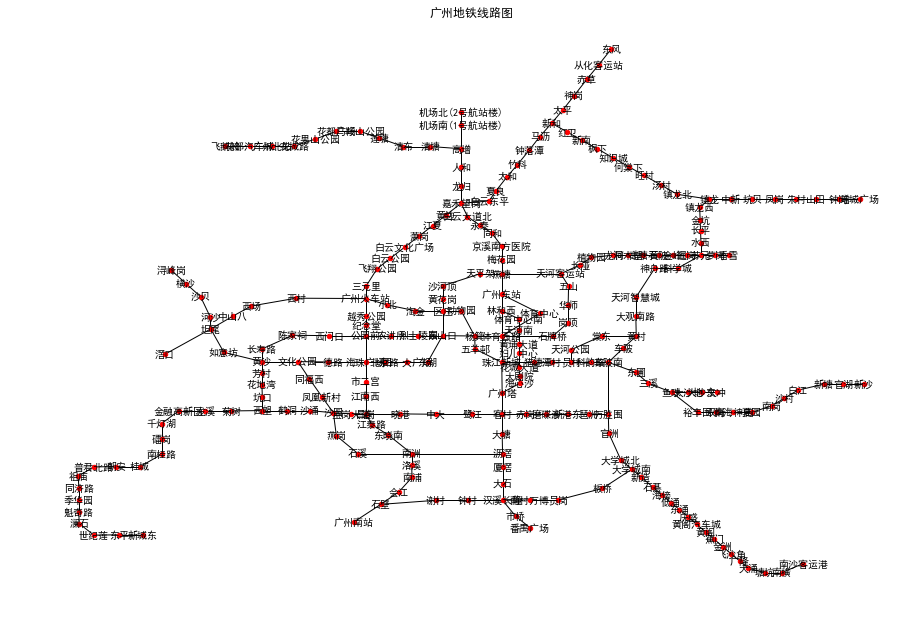

In [28]:
# Ê†πÊçÆPÂÄº ÁªòÂà∂ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæÔºåÂü∫Êú¨ËøòÂéü‰∫ÜÂÆòÁΩë‰∏äÊòæÁ§∫ÂæóÁ∫øË∑ØÂõæ
station_graph = nx.Graph(connections)                
station_graph.add_nodes_from(stations)
fig = plt.figure(figsize=(12,8)) #ÂàõÂª∫‰∏ÄÂπÖÂõæ
nx.draw(station_graph, station_location_pxy, with_labels=True, node_size=20, node_color='red',font_color='black',font_size=10,aphla=0.5) # draw a graph of station location
plt.title('ÂπøÂ∑ûÂú∞ÈìÅÁ∫øË∑ØÂõæ')


In [29]:
# ‰ΩøÁî®ËØæÁ®ã‰∏äÁöÑbfsÁÆóÊ≥ï
def search_bfs(graph,start,destination):
    pathes = [[start]]  # list Áî®Êù•Â≠òÂÇ®ÂæÖÊêúÁ¥¢Ë∑ØÂæÑ
    visited = set() # setÁî®Êù•Â≠òÂÇ®Â∑≤ÊêúÁ¥¢ÁöÑËäÇÁÇπ
    
    while pathes:
        path = pathes.pop(0)  #ÊèêÂèñÁ¨¨‰∏ÄÊù°Ë∑ØÂæÑ
        froniter = path[-1]   #ÊèêÂèñÂç≥Â∞ÜË¶ÅÊé¢Á¥¢ÁöÑËäÇÁÇπ
        
        if froniter in visited: continue  #Ê£ÄÊü•Â¶ÇÊûúËØ•ÁÇπÂ∑≤ÁªèÊé¢Á¥¢Ëøá Âàô‰∏çÁî®ÂÜçÊé¢Á¥¢
            
        successsors = graph[froniter]
        
        for city in successsors:      #ÈÅçÂéÜÂ≠êËäÇÁÇπ
            if city in path: continue  # check loop #Ê£ÄÊü•‰ºö‰∏ç‰ºöÂΩ¢ÊàêÁéØ
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs     #Â∞ÜÊñ∞Ë∑ØÂæÑÂä†Âà∞listÈáåÈù¢
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #Ê£ÄÊü•ÁõÆÁöÑÂú∞ÊòØ‰∏çÊòØÂ∑≤ÁªèÊêúÁ¥¢Âà∞‰∫Ü
                return new_path
        visited.add(froniter)

In [30]:
# ‰ΩøÁî®emojizeÂåÖÔºåÊ∑ªÂä†Ë°®ÊÉÖÂõæÊ°à
def emojize_print(lst):
    return emojize(':four_leaf_clover: => ').join(lst)    

In [31]:
emojize_print(search_bfs(connections,'ÂπøÂ∑ûÂçóÁ´ô', 'Áè†Ê±üÊñ∞Âüé'))

'ÂπøÂ∑ûÂçóÁ´ôüçÄ => Áü≥Â£ÅüçÄ => ‰ºöÊ±üüçÄ => ÂçóÊµ¶üçÄ => Ê¥õÊ∫™üçÄ => ÂçóÊ¥≤üçÄ => Ê≤•ÊªòüçÄ => Â§ßÂ°òüçÄ => ÂÆ¢ÊùëüçÄ => ÂπøÂ∑ûÂ°îüçÄ => Áè†Ê±üÊñ∞Âüé'

In [32]:
emojize_print(search_bfs(connections,'Áï™Á¶∫ÂπøÂú∫', '‰∏âÂÖÉÈáå'))

'Áï™Á¶∫ÂπøÂú∫üçÄ => Â∏ÇÊ°•üçÄ => Ê±âÊ∫™ÈïøÈöÜüçÄ => Â§ßÁü≥üçÄ => Âé¶ÊªòüçÄ => Ê≤•ÊªòüçÄ => Â§ßÂ°òüçÄ => ÂÆ¢ÊùëüçÄ => ÂπøÂ∑ûÂ°îüçÄ => Áè†Ê±üÊñ∞ÂüéüçÄ => ‰ΩìËÇ≤Ë•øË∑ØüçÄ => Êù®ÁÆïüçÄ => ‰∏úÂ±±Âè£üçÄ => Âå∫Â∫ÑüçÄ => Ê∑òÈáëüçÄ => Â∞èÂåóüçÄ => ÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüçÄ => ‰∏âÂÖÉÈáå'

In [33]:
emojize_print(search_bfs(connections,'Êñ∞Âüé‰∏ú', '‰∏úÈ£é'))

'Êñ∞Âüé‰∏úüçÄ => ‰∏úÂπ≥üçÄ => ‰∏ñÁ∫™Ëé≤üçÄ => ÊæúÁü≥üçÄ => È≠ÅÂ•áË∑ØüçÄ => Â≠£ÂçéÂõ≠üçÄ => ÂêåÊµéË∑ØüçÄ => Á•ñÂ∫ôüçÄ => ÊôÆÂêõÂåóË∑ØüçÄ => ÊúùÂÆâüçÄ => Ê°ÇÂüéüçÄ => ÂçóÊ°ÇË∑ØüçÄ => Á§åÂ≤óüçÄ => ÂçÉÁÅØÊπñüçÄ => ÈáëËûçÈ´òÊñ∞Âå∫üçÄ => ÈæôÊ∫™üçÄ => ËèäÊ†ëüçÄ => Ë•øÂ°±üçÄ => ÂùëÂè£üçÄ => Ëä±Âú∞ÊπæüçÄ => Ëä≥ÊùëüçÄ => ÈªÑÊ≤ôüçÄ => Â¶ÇÊÑèÂùäüçÄ => Âù¶Â∞æüçÄ => ‰∏≠Â±±ÂÖ´üçÄ => Ë•øÂú∫üçÄ => Ë•øÊùëüçÄ => ÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüçÄ => ‰∏âÂÖÉÈáåüçÄ => È£ûÁøîÂÖ¨Âõ≠üçÄ => ÁôΩ‰∫ëÂÖ¨Âõ≠üçÄ => ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫üçÄ => ËêßÂ≤óüçÄ => Ê±üÂ§èüçÄ => ÈªÑËæπüçÄ => ÂòâÁ¶æÊúõÂ≤óüçÄ => ÁôΩ‰∫ë‰∏úÂπ≥üçÄ => Â§èËâØüçÄ => Â§™ÂíåüçÄ => Á´πÊñôüçÄ => ÈíüËêΩÊΩ≠üçÄ => È©¨Ê≤•üçÄ => Êñ∞ÂíåüçÄ => Â§™Âπ≥üçÄ => Á•ûÂ≤óüçÄ => Ëµ§ËçâüçÄ => ‰ªéÂåñÂÆ¢ËøêÁ´ôüçÄ => ‰∏úÈ£é'

### (Optional) Improve your agent to make it able to find a path based on different strategies
### ÈÄâÂÅöÈ¢ò

In [34]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [35]:
# Ê†πÊçÆÁ´ôÁÇπÈó¥ÁöÑË∑ùÁ¶ªÔºåËé∑ÂæóÊúÄÁü≠Ë∑ØÂæÑ
def sort_by_distance(pathes):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_station_distance(path[i],path[i+1])
        return distance
    return sorted(pathes,key=get_distance_of_path)

In [36]:
def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_station_distance(path[i],path[i+1])
    return distance

In [37]:
# ËÆ°ÁÆó‰∏§‰∏™Á´ôÁÇπÈó¥ÂæóË∑ùÁ¶ª
def get_station_distance(station1,station2):
    return geo_distance(station_location[station1],station_location[station2])

In [38]:
def search_bfs_op(graph,start,destination,search_strategy = sort_by_distance):
    pathes = [[start]]
    visited = set()# ÔºÅ
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ÔºÅ
            
        if froniter == destination:# ÔºÅ
            return path# ÔºÅ
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ÔºÅ
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  
        

In [39]:
emojize_print(search_bfs_op(connections,'ÂπøÂ∑ûÂçóÁ´ô', 'Áè†Ê±üÊñ∞Âüé'))

'ÂπøÂ∑ûÂçóÁ´ôüçÄ => Áü≥Â£ÅüçÄ => ‰ºöÊ±üüçÄ => ÂçóÊµ¶üçÄ => Ê¥õÊ∫™üçÄ => ÂçóÊ¥≤üçÄ => Ê≤•ÊªòüçÄ => Â§ßÂ°òüçÄ => ÂÆ¢ÊùëüçÄ => ÂπøÂ∑ûÂ°îüçÄ => Áè†Ê±üÊñ∞Âüé'

In [40]:
emojize_print(search_bfs_op(connections,'Áï™Á¶∫ÂπøÂú∫', '‰∏âÂÖÉÈáå'))

'Áï™Á¶∫ÂπøÂú∫üçÄ => Â∏ÇÊ°•üçÄ => Ê±âÊ∫™ÈïøÈöÜüçÄ => Â§ßÁü≥üçÄ => Âé¶ÊªòüçÄ => Ê≤•ÊªòüçÄ => ÂçóÊ¥≤üçÄ => ‰∏úÊôìÂçóüçÄ => Ê±üÊ≥∞Ë∑ØüçÄ => ÊòåÂ≤óüçÄ => Ê±üÂçóË•øüçÄ => Â∏Ç‰∫åÂÆ´üçÄ => Êµ∑Áè†ÂπøÂú∫üçÄ => ÂÖ¨Âõ≠ÂâçüçÄ => Á∫™ÂøµÂ†ÇüçÄ => Ë∂äÁßÄÂÖ¨Âõ≠üçÄ => ÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüçÄ => ‰∏âÂÖÉÈáå'

In [41]:
emojize_print(search_bfs_op(connections,'Êñ∞Âüé‰∏ú', '‰∏úÈ£é'))

'Êñ∞Âüé‰∏úüçÄ => ‰∏úÂπ≥üçÄ => ‰∏ñÁ∫™Ëé≤üçÄ => ÊæúÁü≥üçÄ => È≠ÅÂ•áË∑ØüçÄ => Â≠£ÂçéÂõ≠üçÄ => ÂêåÊµéË∑ØüçÄ => Á•ñÂ∫ôüçÄ => ÊôÆÂêõÂåóË∑ØüçÄ => ÊúùÂÆâüçÄ => Ê°ÇÂüéüçÄ => ÂçóÊ°ÇË∑ØüçÄ => Á§åÂ≤óüçÄ => ÂçÉÁÅØÊπñüçÄ => ÈáëËûçÈ´òÊñ∞Âå∫üçÄ => ÈæôÊ∫™üçÄ => ËèäÊ†ëüçÄ => Ë•øÂ°±üçÄ => ÂùëÂè£üçÄ => Ëä±Âú∞ÊπæüçÄ => Ëä≥ÊùëüçÄ => ÈªÑÊ≤ôüçÄ => ÈïøÂØøË∑ØüçÄ => ÈôàÂÆ∂Á•†üçÄ => Ë•øÈó®Âè£üçÄ => ÂÖ¨Âõ≠ÂâçüçÄ => Á∫™ÂøµÂ†ÇüçÄ => Ë∂äÁßÄÂÖ¨Âõ≠üçÄ => ÂπøÂ∑ûÁÅ´ËΩ¶Á´ôüçÄ => ‰∏âÂÖÉÈáåüçÄ => È£ûÁøîÂÖ¨Âõ≠üçÄ => ÁôΩ‰∫ëÂÖ¨Âõ≠üçÄ => ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫üçÄ => ËêßÂ≤óüçÄ => Ê±üÂ§èüçÄ => ÈªÑËæπüçÄ => ÂòâÁ¶æÊúõÂ≤óüçÄ => ÁôΩ‰∫ë‰∏úÂπ≥üçÄ => Â§èËâØüçÄ => Â§™ÂíåüçÄ => Á´πÊñôüçÄ => ÈíüËêΩÊΩ≠üçÄ => È©¨Ê≤•üçÄ => Êñ∞ÂíåüçÄ => Â§™Âπ≥üçÄ => Á•ûÂ≤óüçÄ => Ëµ§ËçâüçÄ => ‰ªéÂåñÂÆ¢ËøêÁ´ôüçÄ => ‰∏úÈ£é'

### Â¢ûÂä†Êç¢‰πòÔºåÊç¢‰πòÊ¨°Êï∞ÊéíÂ∫èÔºåÁªìÂêàÊúÄÁü≠Ë∑ØÂæÑÁöÑ‰ºòÂåñ

In [42]:
# Â¢ûÂä†ËÆ∞ÂΩïÊØè‰∏™Á´ôÁÇπÂØπÂ∫îÁöÑÁ∫øË∑ØÔºåÂ¶ÇÔºö'Â≠£ÂçéÂõ≠': {'Âπø‰ΩõÁ∫ø'}   'Ê±âÊ∫™ÈïøÈöÜ': {'3Âè∑Á∫ø', '7Âè∑Á∫ø'}
change_line = {}
for s in stations:
    change_line[s] = set()
for line, stations in station_line.items():
    for s in stations:
        change_line[s].add(line)

In [43]:
change_line

{'Â∫ÜÁõõ': {'4Âè∑Á∫ø'},
 'Á∫¢Âç´': {'14Âè∑Á∫øÊîØÁ∫ø(Áü•ËØÜÂüéÁ∫ø)'},
 'Ë•øÂú∫': {'5Âè∑Á∫ø'},
 'ÈíüÊùë': {'7Âè∑Á∫ø'},
 'Êñ∞Âüé‰∏ú': {'Âπø‰ΩõÁ∫ø'},
 'ÈïáÈæôÂåó': {'14Âè∑Á∫øÊîØÁ∫ø(Áü•ËØÜÂüéÁ∫ø)'},
 'ÊûóÂíåË•ø': {'3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)', 'APMÁ∫ø'},
 '‰∏≠Êñ∞': {'21Âè∑Á∫ø'},
 'Âù¶Â∞æ': {'5Âè∑Á∫ø', '6Âè∑Á∫ø'},
 'ÂçóÊ°ÇË∑Ø': {'Âπø‰ΩõÁ∫ø'},
 'ÂêåÁ¶èË•ø': {'8Âè∑Á∫ø'},
 'Êñ∞Ê∏Ø‰∏ú': {'8Âè∑Á∫ø'},
 'Á£®Á¢üÊ≤ô': {'8Âè∑Á∫ø'},
 'Ê§çÁâ©Âõ≠': {'6Âè∑Á∫ø'},
 'Â§™Âíå': {'14Âè∑Á∫ø'},
 'ÁôΩ‰∫ëÊñáÂåñÂπøÂú∫': {'2Âè∑Á∫ø'},
 'ÂêåÂíå': {'3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'},
 'Â∞èÂåó': {'5Âè∑Á∫ø'},
 'Êñ∞Ê≤ô': {'13Âè∑Á∫ø'},
 'Ê∏ÖÂ∏É': {'9Âè∑Á∫ø'},
 'Êñ∞Âíå': {'14Âè∑Á∫ø', '14Âè∑Á∫øÊîØÁ∫ø(Áü•ËØÜÂüéÁ∫ø)'},
 'Êú∫Âú∫Âçó(1Âè∑Ëà™Á´ôÊ•º)': {'3Âè∑Á∫ø(ÂåóÂª∂ÊÆµ)'},
 'Ê≤•Êªò': {'3Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'},
 'Â§™Âπ≥': {'14Âè∑Á∫ø'},
 'Â¢ûÂüéÂπøÂú∫': {'21Âè∑Á∫ø'},
 'Ê≤ôÂõ≠': {'8Âè∑Á∫ø', 'Âπø‰ΩõÁ∫ø'},
 'ÈªÑÈòÅÊ±ΩËΩ¶Âüé': {'4Âè∑Á∫ø'},
 '‰ΩìËÇ≤‰∏≠ÂøÉ': {'1Âè∑Á∫ø'},
 'ÂçéÂ∏à': {'3Âè∑Á∫ø'},
 'Âåó‰∫¨Ë∑Ø': {'6Âè∑Á∫ø'},
 '‰∏úÊôìÂçó': {'2Âè∑Á∫ø'},
 'ÂπøÂ∑ûÂçó

In [44]:
# ‰∏∫Á´ôÁÇπÂ¢ûÂä†Ë°®ÊÉÖÂõæÊ°à
def pretty_print():
    return emojize(":four_leaf_clover:")

# ‰∏∫Âú∞ÈìÅÁ∫øË∑ØÂ¢ûÂä†Ë°®ÊÉÖÂõæÊ°à
def pretty_print1():
    return emojize(":hibiscus:")

In [45]:
# ÂØªÊâæÊç¢‰πòÁöÑÁÆóÊ≥ïÔºåÊâæÂà∞Ë∑ØÁ∫ø‰ª•ÂêéÈúÄË¶ÅËÄÉËôëÂØªÊâæÊç¢‰πòÁöÑÁÆóÊ≥ï„ÄÇ
# ÊÄùË∑ØÊòØÂØªÊâæÁ¨¨‰∏ÄÁ´ô‰∏éÁ¨¨‰∫åÁ´ôÁöÑÁõ∏ÂêåÁ∫øË∑ØÔºàËøôÊù°Á∫øË∑ØÊúâ‰∏îÂè™Êúâ‰∏ÄÊù°Ôºå
# ËøôÊÑèÂë≥ÁùÄ‰πòÂÆ¢‰ºöÂú®ËØ•Á∫øË∑Ø‰∏ä‰ªéÁ¨¨‰∏ÄÁ´ôÂéªÁ¨¨‰∫åÁ´ôÔºâÔºåÂÜç‰∏éÁ¨¨‰∫åÁ´ô‰∏é
#Á¨¨‰∏âÁ´ôÁöÑÁõ∏ÂêåÁ∫øË∑ØËøõË°åÊØîËæÉÔºåÂ¶ÇÊûú‰∏çÂêåÂàôÊÑèÂë≥ÁùÄÁ∫øË∑ØÊõ¥Êîπ.
def change_routes(path):
    change = []
    for i in range(len(path)-2):
        change_1 = change_line[path[i+1]] - (change_line[path[i+1]] - change_line[path[i]])
        change_2 = change_line[path[i+2]] - (change_line[path[i+2]] - change_line[path[i+1]])
        if change_1 == change_2: continue
        else:
            node = 'Âú®'+ pretty_print1()+change_1.pop()+"  "\
            + pretty_print()+ path[i+1] +'  ËΩ¨  '+ pretty_print1()\
            + change_2.pop()+ "\n" # ÊâìÂç∞Êç¢‰πò‰ø°ÊÅØ
            change.append(node)
    change = "".join(change)
    return change


In [46]:
# ‰∏∫Ë∑ØÁ∫ø‰ª•Êç¢‰πòÊ¨°Êï∞ÊéíÂ∫èÁöÑÁÆóÊ≥ïÔºåËøôÈáå‰∏é‰∏äÈù¢ÁöÑÂØªÊâæÊç¢‰πòÁöÑÁÆóÊ≥ïÁ±ª‰ººÔºåÂè™‰∏çËøáËøôÈáåËøîÂõûÁöÑÊòØÊç¢‰πòÊ¨°Êï∞
def change_num(pathes):
    num = []
    for path in pathes:
        j = 0
        for i in range(len(path)-2):
            change_1 = change_line[path[i+1]] - (change_line[path[i+1]] - change_line[path[i]])
            change_2 = change_line[path[i+2]] - (change_line[path[i+2]] - change_line[path[i+1]])
            if change_1 == change_2: continue
            else:
                j += 1
        num.append(j)
    return num


In [54]:
# ‰ªéÂéüÊúâÁöÑsearch_bfs_opÂü∫Á°Ä‰∏äÔºåÂ¢ûÂä†ÂØªÊâæÊç¢‰πòÁ∫øË∑ØÔºåÊç¢‰πòÊ¨°Êï∞ÊéíÂ∫è
def search(graph, start, destination, search_strategy = sort_by_distance):
    pathes = [[start]]
    visited = set()# ÔºÅ
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ÔºÅ
            
        if froniter == destination:# ÔºÅ
            return path# ÔºÅ        
        successsors = graph[froniter]        
        for step in successsors:
            if step in path: continue  # check loop            
            new_path = path+[step]            
            pathes.append(new_path)  #bfs
            if step == destination: 
                # ÊâìÂç∞Êç¢‰πò‰ø°ÊÅØ
                route = "‰ªé "+pretty_print()+f"{start}"+"  ‰∏äËΩ¶  "+"\n"+ \
                change_routes(new_path)+"Âà∞"+pretty_print()+f"{destination}"+"  ‰∏ãËΩ¶" 
                return route            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ÔºÅ
        pathes = sorted(pathes, key=lambda x: change_num(pathes))
        

In [55]:
%%time
print(search(connections,'Ê≤≥Ê≤ô', '‰∫îÂ±±'))

‰ªé üçÄÊ≤≥Ê≤ô  ‰∏äËΩ¶  
Âú®üå∫6Âè∑Á∫ø  üçÄ‰∏úÂ±±Âè£  ËΩ¨  üå∫1Âè∑Á∫ø
Âú®üå∫1Âè∑Á∫ø  üçÄ‰ΩìËÇ≤Ë•øË∑Ø  ËΩ¨  üå∫3Âè∑Á∫ø
Âà∞üçÄ‰∫îÂ±±  ‰∏ãËΩ¶
Wall time: 142 ms


In [57]:
%%time
print(search(connections,'ÂπøÂ∑ûÂçóÁ´ô', 'Áè†Ê±üÊñ∞Âüé'))

‰ªé üçÄÂπøÂ∑ûÂçóÁ´ô  ‰∏äËΩ¶  
Âú®üå∫2Âè∑Á∫ø  üçÄÁü≥Â£Å  ËΩ¨  üå∫2Âè∑Á∫ø
Âú®üå∫2Âè∑Á∫ø  üçÄÂçóÊ¥≤  ËΩ¨  üå∫Âπø‰ΩõÁ∫ø
Âú®üå∫Âπø‰ΩõÁ∫ø  üçÄÊ≤•Êªò  ËΩ¨  üå∫3Âè∑Á∫ø
Âà∞üçÄÁè†Ê±üÊñ∞Âüé  ‰∏ãËΩ¶
Wall time: 18 ms


In [58]:
%%time
print(search(connections,'Êñ∞Âüé‰∏ú', '‰∏úÈ£é'))

‰ªé üçÄÊñ∞Âüé‰∏ú  ‰∏äËΩ¶  
Âú®üå∫Âπø‰ΩõÁ∫ø  üçÄË•øÂ°±  ËΩ¨  üå∫1Âè∑Á∫ø
Âú®üå∫1Âè∑Á∫ø  üçÄÂÖ¨Âõ≠Ââç  ËΩ¨  üå∫2Âè∑Á∫ø
Âú®üå∫2Âè∑Á∫ø  üçÄÂòâÁ¶æÊúõÂ≤ó  ËΩ¨  üå∫14Âè∑Á∫ø
Âà∞üçÄ‰∏úÈ£é  ‰∏ãËΩ¶
Wall time: 589 ms
